<a href="https://colab.research.google.com/github/yoouza/bigcontest/blob/master/data_analysis/TimeSeries_Predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
data_2019 = pd.read_csv('/content/drive/My Drive/머신러닝/팀 프로젝트/빅콘테스트/02. Preprocessing_Data/2019_data.csv', encoding='utf-8', index_col=0)
data_2019.head()

,2019-02-01,2019-02-02,2019-02-03,2019-02-04,2019-02-05,2019-02-06,2019-02-07,2019-02-08,2019-02-09,2019-02-10,2019-02-11,2019-02-12,2019-02-13,2019-02-14,2019-02-15,2019-02-16,2019-02-17,2019-02-18,2019-02-19,2019-02-20,2019-02-21,2019-02-22,2019-02-23,2019-02-24,2019-02-25,2019-02-26,2019-02-27,2019-02-28,2019-03-01,2019-03-02,2019-03-03,2019-03-04,2019-03-05,2019-03-06,2019-03-07,2019-03-08,2019-03-09,2019-03-10,2019-03-11,2019-03-12,...,2019-04-22,2019-04-23,2019-04-24,2019-04-25,2019-04-26,2019-04-27,2019-04-28,2019-04-29,2019-04-30,2019-05-01,2019-05-02,2019-05-03,2019-05-04,2019-05-05,2019-05-06,2019-05-07,2019-05-08,2019-05-09,2019-05-10,2019-05-11,2019-05-12,2019-05-13,2019-05-14,2019-05-15,2019-05-16,2019-05-17,2019-05-18,2019-05-19,2019-05-20,2019-05-21,2019-05-22,2019-05-23,2019-05-24,2019-05-25,2019-05-26,2019-05-27,2019-05-28,2019-05-29,2019-05-30,2019-05-31
숙박,1475301,1662554,1519794,1595954,1607949,1764864,1783591,1920771,2481883,2342277,2001634,1727767,1596988,1495958,1837038,2191553,2311040,1697187,1595478,1976954,1703506,1929493,2609475,2407589,1864224,1548595,1714109,1796013,2210390,2001920,1858805,1529100,1525801,1471634,1462182,2066715,2412628,2405217,1774502,1555196,...,2361161,2312974,1758130,2015809,2311540,3370319,3229344,2389222,2883402,3265157,2840390,2451140,2808183,2620643,2368720,1896648,1861829,1710021,2025912,2619001,2375313,2169651,1913836,1863930,1901731,2132419,2813070,2540190,2488443,1911437,1927931,2013568,2501561,3772612,2514747,2634966,2038949,2228258,2186711,2577217
레저용품,925726,1452418,1088861,1003768,727146,1308610,892269,851803,1287731,1232678,763947,726959,758613,775728,730670,1207343,1257525,675939,662779,721322,757920,809451,1375276,1460689,797087,924347,837871,952512,1616164,1785753,1732622,861863,731671,765580,710719,892353,1554272,1484526,720416,681212,...,904432,827090,914811,724045,841059,1773025,1600696,698446,985367,1411216,1060837,1159442,1985931,1979144,1587951,897086,866376,810231,1013610,1717293,1696887,858368,853397,818559,823732,921290,1602793,1229207,738720,806937,778543,786641,1002406,1703447,1611017,630853,885078,850541,769525,922809
레저업소,556821,453984,377059,320572,214715,309199,439243,546633,456769,374155,567428,562264,586987,492338,458900,431931,339486,536922,568011,540709,477419,491519,463353,342134,533486,613597,521236,655125,470487,454453,351873,728025,538830,454734,467091,481145,513710,391828,588641,470954,...,583508,478109,504521,465582,477783,510636,343513,662044,735041,498469,522588,471488,457179,319582,352495,561279,468051,438472,444671,401157,319641,458801,386603,460999,425397,432254,441805,329593,652354,474772,513903,461446,473637,463215,300772,441604,542027,459924,471977,555272
문화취미,221697,303195,241879,211858,197949,258490,191375,214700,259467,198545,203479,247976,191689,235372,196309,243099,208603,168691,170849,165707,199535,203267,271677,221490,153850,156355,195068,219777,328875,236626,180396,163347,132515,174620,159543,209509,306562,236388,168275,120808,...,157086,150520,235902,221678,217360,338290,277300,182659,151557,238268,202820,251713,325129,303808,303275,336553,322763,185621,200793,227520,204795,168983,217482,198782,149562,178408,254833,217545,158237,177432,146040,161490,193860,252206,224966,191136,134804,198939,234099,216266
가구,20244,64324,10250,10292,6192,21724,36505,52945,94597,105715,90802,57422,36442,50089,42125,66112,99640,60052,65160,42093,74977,29674,175455,69402,50375,21140,99807,31789,116461,56631,117457,51731,43405,64884,38441,59626,108852,61072,69345,49130,...,120736,37979,40467,23429,56095,101572,59856,29705,105240,73198,46900,79576,83285,55250,134458,71885,48554,41082,32414,93377,117521,35330,68801,51734,40071,80681,75793,55076,69781,67370,57481,48524,46615,107343,110556,36044,68302,55866,40236,24945


In [3]:
import datetime

dates = list(data_2019.keys().unique())

time_2019 = []
time_2020 = []
# # 날짜 데이터로 저장
for date in dates:
    time_2019.append(datetime.datetime.strptime(date, "%Y-%m-%d").date())

time_2019[:5]

[datetime.date(2019, 2, 1),
 datetime.date(2019, 2, 2),
 datetime.date(2019, 2, 3),
 datetime.date(2019, 2, 4),
 datetime.date(2019, 2, 5)]

In [4]:
# data = pd.DataFrame(data_2019.loc['숙박'].values.reshape(1, len(data_2019.loc['숙박'].values)), columns=time_2019)
data = data_2019.loc['레저용품']
data[:5]

2019-02-01     925726
2019-02-02    1452418
2019-02-03    1088861
2019-02-04    1003768
2019-02-05     727146
Name: 레저용품, dtype: int64

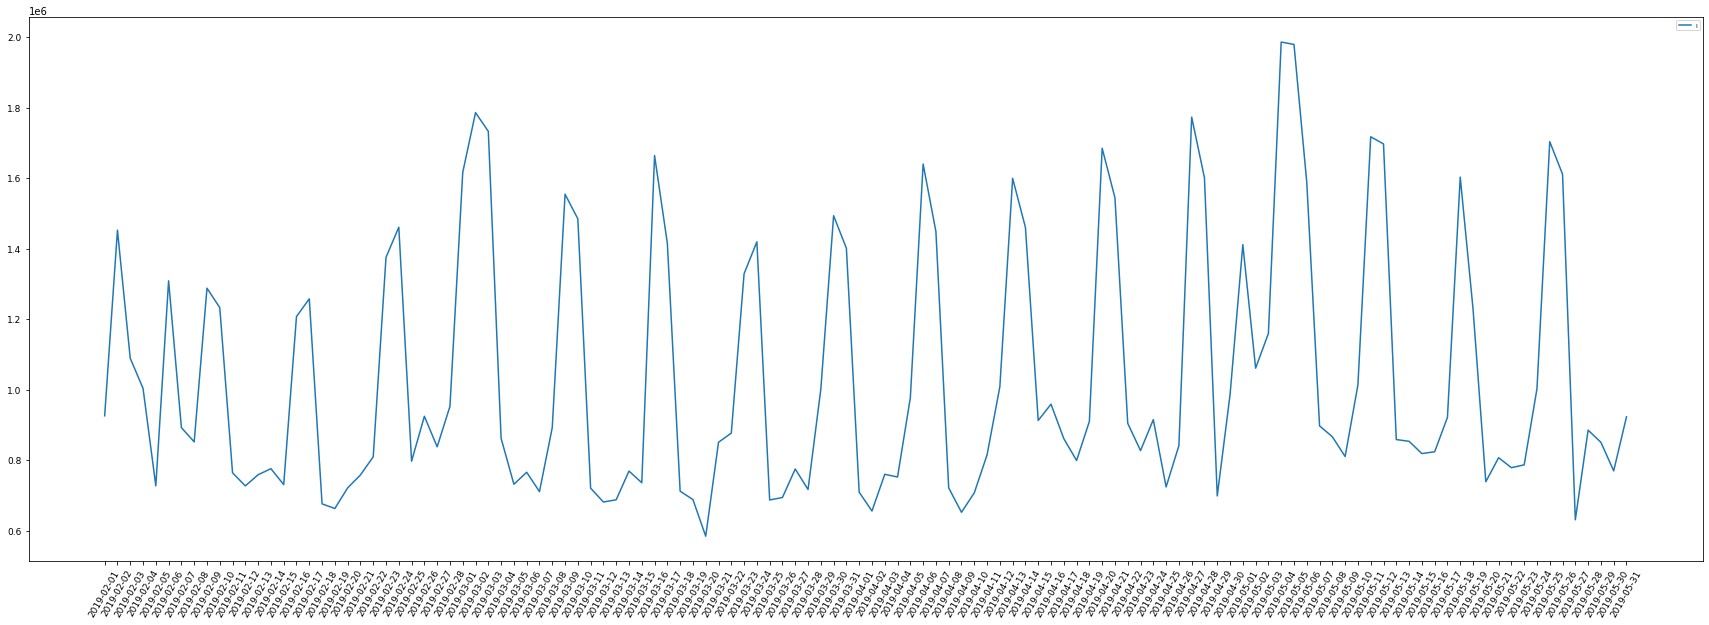

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(30, 10))

sns.lineplot(data = data)
plt.legend(('lesuire Item'), fontsize=6)
plt.xticks(rotation = 60, fontsize = 9)
plt.tick_params(labelsize = 9)
plt.show()

In [10]:
y = data.to_list()
training_set = [[x] for x in data.to_list()]

In [11]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [12]:
import numpy as np
x_train = []
y_train = []

n = 7
n_test = 17

for i in range(n, 120):
    x_train.append(training_set_scaled[i-n:i, 0])
    y_train.append(training_set_scaled[i, 0])

x_train, y_train, x_test, y_test = np.array(x_train[:-n]), np.array(y_train[:-n]), np.array(x_train[-n:]), np.array(y_train[-n:])
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((106, 7), (106,), (7, 7), (7,))

In [13]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# **LSTM 모델**

In [18]:
from matplotlib import pyplot as plt
from keras.layers import Dense, LSTM, Dropout
from keras.models import Sequential

# 모델링
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 200, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))

# 모델 컴파일
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 7, 50)             10400     
_________________________________________________________________
dropout_5 (Dropout)          (None, 7, 50)             0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 7, 100)            60400     
_________________________________________________________________
dropout_6 (Dropout)          (None, 7, 100)            0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 7, 200)            240800    
_________________________________________________________________
dropout_7 (Dropout)          (None, 7, 200)            0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 7, 100)           

In [ ]:
# 모델 피팅
regressor.fit(x_train, y_train, epochs = 1000, batch_size = 10)

In [20]:
# 예측값 출력
predicted_price = regressor.predict(x_test)
y_hat = sc.inverse_transform(predicted_price)

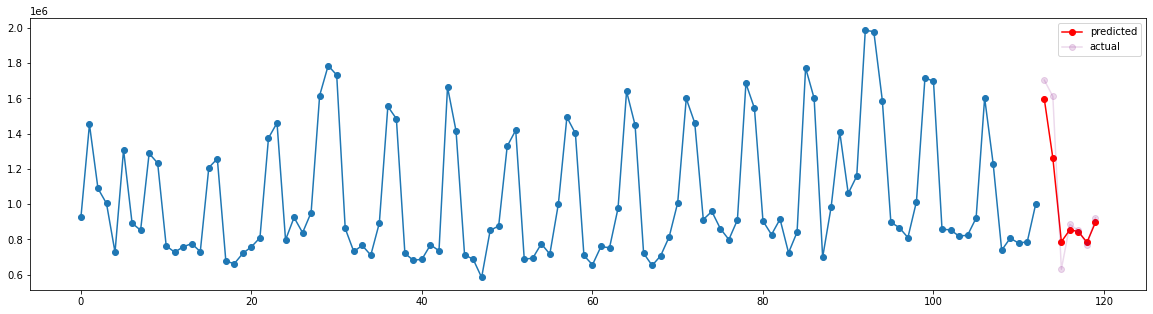

In [21]:
# 예측값과 실제 값 비교
n_y_hat = len(y_hat)
y_axis = np.arange(0, len(y)-n_y_hat)
y_2_axis = np.arange(len(y)-n_y_hat, len(y))

plt.figure(figsize=(20, 5))
plt.plot(y_axis, y[:-n_y_hat], '-o') # Train데이터 그래프로 표현
plt.plot(y_2_axis, y_hat, '-o', color='red', label='predicted') #x_test 예측값 그래프로 표현
plt.plot(y_2_axis, y[-n_y_hat:], '-o', color='purple', alpha=0.15, label='actual') #y_test 실제값 그래프로 표현 

plt.legend()
plt.show()

# **GRU 모델링**

In [22]:
#from tensorflow.keras import datasets, layers, models
from keras.layers import Dense, GRU, Dropout

model = Sequential()
model.add(GRU(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1))) #GRU를 호출
model.add(Dropout(0.2))
model.add(GRU(units = 100, return_sequences = True))
model.add(Dropout(0.2))
model.add(GRU(units = 200, return_sequences = True))
model.add(Dropout(0.2))
model.add(GRU(units = 100, return_sequences = True))
model.add(Dropout(0.2))
model.add(GRU(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(Dense(units = 1))

# 모델 컴파일
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 7, 50)             7950      
_________________________________________________________________
dropout_10 (Dropout)         (None, 7, 50)             0         
_________________________________________________________________
gru_1 (GRU)                  (None, 7, 100)            45600     
_________________________________________________________________
dropout_11 (Dropout)         (None, 7, 100)            0         
_________________________________________________________________
gru_2 (GRU)                  (None, 7, 200)            181200    
_________________________________________________________________
dropout_12 (Dropout)         (None, 7, 200)            0         
_________________________________________________________________
gru_3 (GRU)                  (None, 7, 100)           

In [ ]:
# 모델 피팅
model.fit(x_train, y_train, epochs = 1000, batch_size = 10)

In [24]:
# 예측값 출력
predicted_price = regressor.predict(x_test)
y_hat = sc.inverse_transform(predicted_price)

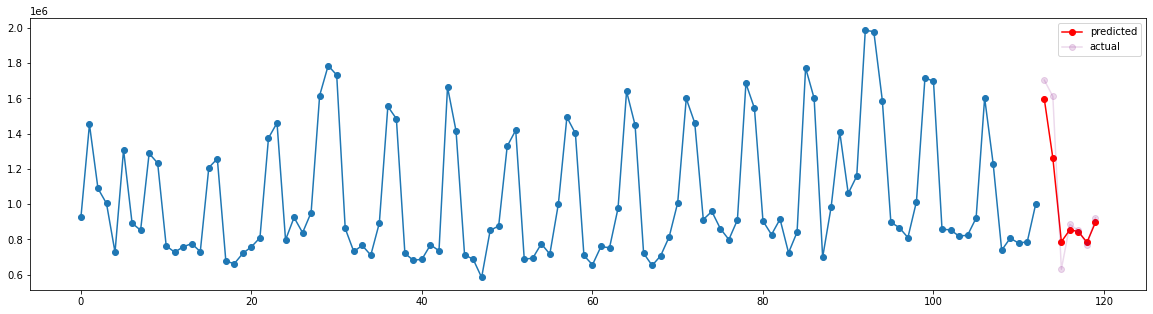

In [25]:
# 예측값과 실제 값 비교
n_y_hat = len(y_hat)
y_axis = np.arange(0, len(y)-n_y_hat)
y_2_axis = np.arange(len(y)-n_y_hat, len(y))

plt.figure(figsize=(20, 5))
plt.plot(y_axis, y[:-n_y_hat], '-o') # Train데이터 그래프로 표현
plt.plot(y_2_axis, y_hat, '-o', color='red', label='predicted') #x_test 예측값 그래프로 표현
plt.plot(y_2_axis, y[-n_y_hat:], '-o', color='purple', alpha=0.15, label='actual') #y_test 실제값 그래프로 표현 

plt.legend()
plt.show()

# **Attention 모델**

In [27]:
import numpy as np
x_train = []
y_train = []

n = 7
n_test = 17

for i in range(n, 120):
    x_train.append(training_set_scaled[i-n:i, 0])
    y_train.append(training_set_scaled[i, 0])

x_train, y_train, x_test, y_test = np.array(x_train[:-n]), np.array(y_train[:-n]), np.array(x_train[-n:]), np.array(y_train[-n:])
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((106, 7), (106,), (7, 7), (7,))

In [37]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_train.shape

(106, 7, 1)

In [28]:
#from tensorflow.keras import datasets, layers, models
from keras.layers import Dense, Attention, Dropout

model = Sequential()
model.add(Attention(units = 50,return_sequences = True, input_shape = (x_train.shape[1], 1))) #GRU를 호출
model.add(Dense(units = 1))

# 모델 컴파일
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

model.summary()

TypeError: ignored